READ BEFORE EXECUTION: At the first execution, please un-comment the first cell by removing the # symbol and then execute it totally. This is to install the chainladder module. Before further executions, please comment the first cell by adding the # symbol before the ! symbol.

# **PySpark Installation**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
#!wget https://downloads.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2022-04-11 13:54:01--  https://downloads.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  19.2MB/s    in 15s     

2022-04-11 13:54:16 (17.8 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [ ]:
#!tar -xvzf /content/spark-3.2.1-bin-hadoop2.7.tgz

spark-3.2.1-bin-hadoop2.7/
spark-3.2.1-bin-hadoop2.7/LICENSE
spark-3.2.1-bin-hadoop2.7/NOTICE
spark-3.2.1-bin-hadoop2.7/R/
spark-3.2.1-bin-hadoop2.7/R/lib/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/DESCRIPTION
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/Rd.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/features.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/hsearch.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/links.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/nsInfo.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/package.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/NAMESPACE
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/SparkR
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdb
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdx
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/help/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/help/An

In [ ]:
#!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

# **Packages**

In [ ]:
#!pip install chainladder

     |████████████████████████████████| 1.3 MB 7.5 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 


In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import os
import copy
import chainladder as cl
from sklearn.linear_model import PoissonRegressor
from statsmodels.graphics.factorplots import interaction_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **R to Python Code Conversion**

# **Development Triangle**

In [ ]:
data=pd.DataFrame([[2007,3511, 3215, 2266, 1712, 1059, 587,340],[2008,4001, 3702, 2278, 1180, 956,629],[2009,4355, 3932, 1946, 1522, 1238],[2010,4295, 3455, 2023, 1320],[2011,4150, 3747,2320],[2012,5102, 4548],[2013,6283]])
data=data.set_index(data[0])
data=data.drop([0],axis=1)
data=data.rename_axis('origin',axis='rows')
data=data.rename_axis('dev',axis='columns')
data

dev,1,2,3,4,5,6,7
origin,,,,,,,
2007,3511,3215.0,2266.0,1712.0,1059.0,587.0,340.0
2008,4001,3702.0,2278.0,1180.0,956.0,629.0,NaN
2009,4355,3932.0,1946.0,1522.0,1238.0,NaN,NaN
2010,4295,3455.0,2023.0,1320.0,NaN,NaN,NaN
2011,4150,3747.0,2320.0,NaN,NaN,NaN,NaN
2012,5102,4548.0,NaN,NaN,NaN,NaN,NaN
2013,6283,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
claims=copy.deepcopy(data)
claims=claims.cumsum(axis=1)
claims

dev,1,2,3,4,5,6,7
origin,,,,,,,
2007,3511.0,6726.0,8992.0,10704.0,11763.0,12350.0,12690.0
2008,4001.0,7703.0,9981.0,11161.0,12117.0,12746.0,NaN
2009,4355.0,8287.0,10233.0,11755.0,12993.0,NaN,NaN
2010,4295.0,7750.0,9773.0,11093.0,NaN,NaN,NaN
2011,4150.0,7897.0,10217.0,NaN,NaN,NaN,NaN
2012,5102.0,9650.0,NaN,NaN,NaN,NaN,NaN
2013,6283.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data

dev,1,2,3,4,5,6,7
origin,,,,,,,
2007,3511,3215.0,2266.0,1712.0,1059.0,587.0,340.0
2008,4001,3702.0,2278.0,1180.0,956.0,629.0,NaN
2009,4355,3932.0,1946.0,1522.0,1238.0,NaN,NaN
2010,4295,3455.0,2023.0,1320.0,NaN,NaN,NaN
2011,4150,3747.0,2320.0,NaN,NaN,NaN,NaN
2012,5102,4548.0,NaN,NaN,NaN,NaN,NaN
2013,6283,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#interaction_plot(x=dev,trace=origin,response=data)

# **Chain Ladder Algorithmn**

In [ ]:
# Functions for implementing the chainladder algorithm

# Obtaining the latest diagonal
def latest_diagonal(claims,n):
  lt=[]
  for i in range(0,n):
    lt.append(int(claims.iloc[i,(n-1)-i]))
  return lt

# Finding the f-values
def age_to_age_ratio(claims,n):
  f=[]
  for k in range(0,n-1):
    nums1=[]
    nums2=[]
    for i in range(0,n-k-1):
      if np.isnan(claims.iloc[i,k+1])==False:
        nums1.append(claims.iloc[i,k+1])
      if np.isnan(claims.iloc[i,k])==False:
        nums2.append(claims.iloc[i,k])
    if k+1<n:
      f.append(sum(nums1)/sum(nums2))
  f.append(1)
  return f

# Finding the full triangle
def full_triangle(f,ft,n):
  for i in range(1,n):
    for k in range(n-i,n):
      if k<=n:
        ft.iloc[i,k]=f[k-1]*ft.iloc[i,k-1]
  return ft

# Obtaining the ultimate paid values
def ultimate_paid(ft,n):
  ut=[]
  for i in range(0,n):
    ut.append(math.ceil(ft.iloc[i,n-1]))
  return ut

# Two methods to compute the reserve amount

# Method 1:
def reserve_method1(lt,ldf,n):
  lt_mul=[]
  reserve=0
  for i in range(0,n):
    lt_mul.append(lt[i]*(ldf[i]-1))
  for i in range(0,n):
    reserve=reserve+lt_mul[i]
  return reserve

# Method 2:
def reserve_method2(ut,lt,n):
  sum_values=[]
  reserve=0
  for i in range(0,n):
    sum_values.append(ut[i]-lt[i])
  for i in range(0,n):
    reserve=reserve+sum_values[i]
  return reserve

# Finding the inremental triangle
def incr_triangle(ft,n):
  incr_triangle=copy.deepcopy(ft)
  for i in range(0,n):
    for j in range(1,n):
      incr_triangle.iloc[i,j]=incr_triangle.iloc[i,j]-incr_triangle.iloc[i,j-1]
  return incr_triangle

In [ ]:
n=len(claims.columns)
lt=latest_diagonal(claims,n)
lt

[12690, 12746, 12993, 11093, 10217, 9650, 6283]

In [ ]:
f=age_to_age_ratio(claims,n)
f

[1.889234280317935,
 1.2823814613038604,
 1.1471048513302033,
 1.0967578822129684,
 1.0509212730318258,
 1.0275303643724696,
 1]

In [ ]:
ft=copy.deepcopy(claims)
ft=full_triangle(f,ft,n)
ft

dev,1,2,3,4,5,6,7
origin,,,,,,,
2007,3511.0,6726.000000,8992.000000,10704.000000,11763.000000,12350.000000,12690.000000
2008,4001.0,7703.000000,9981.000000,11161.000000,12117.000000,12746.000000,13096.902024
2009,4355.0,8287.000000,10233.000000,11755.000000,12993.000000,13654.620101,14030.536767
2010,4295.0,7750.000000,9773.000000,11093.000000,12166.335187,12785.860463,13137.859861
2011,4150.0,7897.000000,10217.000000,11719.970266,12853.969769,13508.510273,13880.404483
2012,5102.0,9650.000000,12374.981102,14195.400857,15568.917781,16361.706894,16812.150646
2013,6283.0,11870.058983,15221.943585,17461.165333,19150.670711,20125.847243,20679.919151


In [ ]:
ut=ultimate_paid(ft,n)
ut

[12690, 13097, 14031, 13138, 13881, 16813, 20680]

In [ ]:
rev_f=f
rev_f.reverse()
print(rev_f)

[1, 1.0275303643724696, 1.0509212730318258, 1.0967578822129684, 1.1471048513302033, 1.2823814613038604, 1.889234280317935]


In [ ]:
# ldf= reverse of cummulative product of the f values
cumprod=np.cumprod(rev_f)
cumprod=list(cumprod)
ldf=cumprod
ldf.reverse()
print(ldf)

[3.2914084276889413, 1.7421917768372472, 1.3585597027158167, 1.1843378581656303, 1.0798535186051716, 1.0275303643724696, 1.0]


In [ ]:
#Calculating the Development Pattern of the payments with respect to the Loss Development Factors.
def dev_pattern_finder(ldf):
  x=0
  dev_pattern=list()
  for i in ldf:
    x=1/i
    dev_pattern.append(x)
  return dev_pattern

dev_pattern=dev_pattern_finder(ldf)
print(dev_pattern)

[0.3038213038489875, 0.5739896223223986, 0.7360736506470484, 0.8443536555935625, 0.9260515271475737, 0.9732072498029946, 1.0]


In [ ]:
reserve=reserve_method2(ut,lt,n)
reserve

28658

In [ ]:
#it=incr_triangle(ft,n)
#it

**Tail Factors**

In [ ]:
def get_log_values(f):
  lv=[]
  n=len(f)
  k=0
  for k in range(0,n-1):
    lv.append(math.log(f[k])-1)
  return lv

In [ ]:
log_values=get_log_values(f)
dev=[2,3,4,5,6]
dat=pd.DataFrame(list(zip(log_values,dev)),columns=['log(f)-1','dev'])
dat

,log(f)-1,dev
0,-1.000000,2
1,-0.972842,3
2,-0.950333,4
3,-0.907642,5
4,-0.862759,6


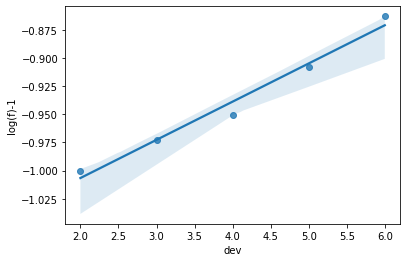

In [ ]:
sns.regplot(x='dev',y='log(f)-1',data=dat)

# **Stochastic Reserving Models**

## Mack Model

### **Implementation using the Chainladder package**

In [ ]:
#Loading the dataset and constructing the Mack Chainladder model.
mack_data=cl.load_sample('ukmotor')
mack = cl.MackChainladder()
dev=cl.Development(average='volume')
mack.fit(dev.fit_transform(mack_data))

MackChainladder()

In [ ]:
mack.summary_

,Latest,IBNR,Ultimate,Mack Std Err
2007,"12,690",,"12,690",
2008,"12,746",351,"13,097",27
2009,"12,993","1,038","14,031",37
2010,"11,093","2,045","13,138",145
2011,"10,217","3,663","13,880",428
2012,"9,650","7,162","16,812",693
2013,"6,283","14,397","20,680",901


/usr/local/lib/python3.7/dist-packages/chainladder/core/pandas.py:57: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)


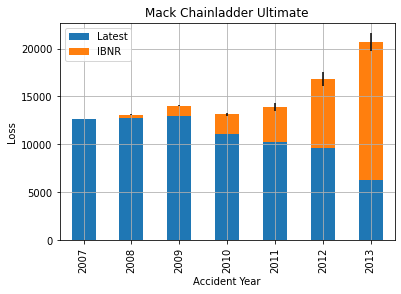

In [ ]:
#Plotting the results of the Mack Chainladder
plot_data = mack.summary_.to_frame()
g = plot_data[['Latest', 'IBNR']].plot(
    kind='bar', stacked=True, ylim=(0, None), grid=True,
    yerr=pd.DataFrame({'latest': plot_data['Mack Std Err']*0,
                       'IBNR': plot_data['Mack Std Err']}),
    title='Mack Chainladder Ultimate').set(
    xlabel='Accident Year', ylabel='Loss');

In [ ]:
#Obtaining the risk parameters
mack.parameter_risk_

,12,24,36,48,60,72,84,9999
2007,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2008,0.00,0.00,0.00,0.00,0.00,0.00,19.42,19.42
2009,0.00,0.00,0.00,0.00,0.00,13.05,24.75,24.75
2010,0.00,0.00,0.00,0.00,64.70,69.09,73.61,73.61
2011,0.00,0.00,0.00,154.14,182.36,192.08,198.43,198.43
2012,0.00,0.00,164.64,265.56,302.80,318.60,328.32,328.32
2013,0.00,111.69,248.04,365.65,413.76,435.25,448.29,448.29


In [ ]:
#Finding out reserve variability of mack
mack.mack_std_err_[mack.mack_std_err_.development==mack.mack_std_err_.development.max()]

,9999
2007,
2008,27.25
2009,36.52
2010,144.53
2011,427.63
2012,693.17
2013,901.41


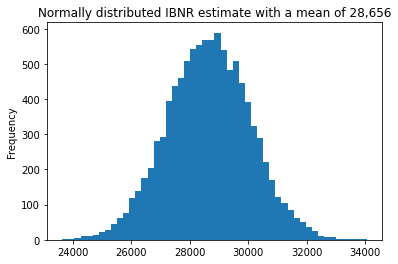

In [ ]:
#The IBNR estimate follows a normal distribution
dist = pd.Series(np.random.normal(mack.ibnr_.sum(),
                           mack.total_mack_std_err_.values[0, 0], size=10000))
dist.plot(
    kind='hist', bins=50,
    title="Normally distributed IBNR estimate with a mean of " + '{:,}'.format(round(mack.ibnr_.sum(),0))[:-2]);

### **Manual Implementation Of Mack Model**

# **Poisson Regression Model**

### **Package Implementation**

In [ ]:
#Creating a Poisson Regression Model first using the TweedieGLM function and then comparing it with a traditional model
ukmotor= cl.load_sample('ukmotor')
dev = cl.TweedieGLM(
    design_matrix = 'C(development) + C(origin)',
    link = 'log', power = 1).fit(ukmotor)
glm = dev.ldf_.iloc[..., 0, :].T.iloc[:,0].rename('GLM')
glm

12-24    1.903994
24-36    1.285808
36-48    1.149283
48-60    1.098853
60-72    1.053725
72-84    1.033266
Name: GLM, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  


12-24    1.889234
24-36    1.282381
36-48    1.147105
48-60    1.096758
60-72    1.050921
72-84    1.027530
Name: Traditional, dtype: float64

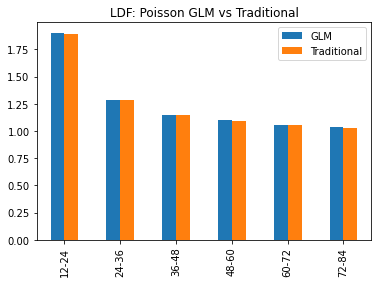

In [ ]:
traditional = cl.Development().fit(ukmotor).ldf_.T.iloc[:, 0].rename('Traditional')
pd.concat((glm,traditional), 1).plot(kind='bar', title='LDF: Poisson GLM vs Traditional');
traditional

### **Manual Implementation**

## **Bootstrap Model**

In [ ]:
boot_data=cl.load_sample('ukmotor')
boot_strap=cl.BootstrapODPSample().fit_transform(boot_data)
boot_strap

,Triangle Summary
Valuation:,2013-12
Grain:,OYDY
Shape:,"(1000, 1, 7, 7)"
Index:,[Total]
Columns:,[values]


# **PySpark Implementation**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark.sql.functions import col, ceil, when, exp, lit
from pyspark.sql.types import *
from pyspark.ml.regression import GeneralizedLinearRegression
from pyspark.ml.feature import OneHotEncoder, VectorAssembler, CountVectorizer, StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql.functions import exp
from pyspark.ml.regression import LinearRegression

In [ ]:
# Creating Spark Object
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
spark

In [ ]:
# Creating a spark dataframe
df1=spark.read.format('csv').load('ukmotor_dataset.csv',header=True)
df1.show()

+--------+--------+------------+
|Acc_Year|Cal_Year|Incured_Loss|
+--------+--------+------------+
|    2007|    2007|        3511|
|    2007|    2008|        3215|
|    2007|    2009|        2266|
|    2007|    2010|        1712|
|    2007|    2011|        1059|
|    2007|    2012|         587|
|    2007|    2013|         340|
|    2008|    2007|        4001|
|    2008|    2008|        3702|
|    2008|    2009|        2278|
|    2008|    2010|        1180|
|    2008|    2011|         956|
|    2008|    2012|         629|
|    2009|    2007|        4355|
|    2009|    2008|        3932|
|    2009|    2009|        1946|
|    2009|    2010|        1522|
|    2009|    2011|        1238|
|    2010|    2007|        4295|
|    2010|    2008|        3455|
+--------+--------+------------+
only showing top 20 rows



In [ ]:
df1.dtypes

[('Acc_Year', 'string'), ('Cal_Year', 'string'), ('Incured_Loss', 'string')]

In [ ]:
df1=df1.withColumn('Acc_Year',df1['Acc_Year'].cast('int'))
df1=df1.withColumn('Cal_Year',df1['Cal_Year'].cast('int'))
df1=df1.withColumn('Incured_Loss',df1['Incured_Loss'].cast('int'))
df1.dtypes

[('Acc_Year', 'int'), ('Cal_Year', 'int'), ('Incured_Loss', 'int')]

In [ ]:
def Claims_DataFrame(data):
  start=data.collect()[0][0]  
  data=data.withColumn('dev',(data['Cal_Year']-start)+1)
  data=data.withColumn('dev',col('dev').cast(IntegerType()))
  data=data.withColumn('inc_paid',data['Incured_Loss'])
  data=data.drop('Cal_Year')
  data=data.drop('Incured_Loss')
  data=data.withColumnRenamed('Acc_Year','origin')
  return data

In [ ]:
Claims_Data=Claims_DataFrame(df1)
Claims_Data.show()

+------+---+--------+
|origin|dev|inc_paid|
+------+---+--------+
|  2007|  1|    3511|
|  2007|  2|    3215|
|  2007|  3|    2266|
|  2007|  4|    1712|
|  2007|  5|    1059|
|  2007|  6|     587|
|  2007|  7|     340|
|  2008|  1|    4001|
|  2008|  2|    3702|
|  2008|  3|    2278|
|  2008|  4|    1180|
|  2008|  5|     956|
|  2008|  6|     629|
|  2009|  1|    4355|
|  2009|  2|    3932|
|  2009|  3|    1946|
|  2009|  4|    1522|
|  2009|  5|    1238|
|  2010|  1|    4295|
|  2010|  2|    3455|
+------+---+--------+
only showing top 20 rows



In [ ]:
df_data1=spark.read.format('csv').load('/content/data1.csv',header=True)
df_data1=df_data1.dropna()
df_data1.show()

+----+----+----+----+----+----+----+----+
| Dev|   1|   2|   3|   4|   5|   6|   7|
+----+----+----+----+----+----+----+----+
|2007|3511|3215|2266|1712|1059| 587| 340|
|2008|4001|3702|2278|1180| 956| 629|None|
|2009|4355|3932|1946|1522|1238|None|None|
|2010|4295|3455|2023|1320|None|None|None|
|2011|4150|3747|2320|None|None|None|None|
|2012|5102|4548|None|None|None|None|None|
|2013|6283|None|None|None|None|None|None|
+----+----+----+----+----+----+----+----+



In [ ]:
df_data1=df_data1.withColumnRenamed('Dev','Origin/Dev')
df_data1.show()

+----------+----+----+----+----+----+----+----+
|Origin/Dev|   1|   2|   3|   4|   5|   6|   7|
+----------+----+----+----+----+----+----+----+
|      2007|3511|3215|2266|1712|1059| 587| 340|
|      2008|4001|3702|2278|1180| 956| 629|None|
|      2009|4355|3932|1946|1522|1238|None|None|
|      2010|4295|3455|2023|1320|None|None|None|
|      2011|4150|3747|2320|None|None|None|None|
|      2012|5102|4548|None|None|None|None|None|
|      2013|6283|None|None|None|None|None|None|
+----------+----+----+----+----+----+----+----+



In [ ]:
Claims_Data.show()

+------+---+--------+
|origin|dev|inc_paid|
+------+---+--------+
|  2007|  1|    3511|
|  2007|  2|    3215|
|  2007|  3|    2266|
|  2007|  4|    1712|
|  2007|  5|    1059|
|  2007|  6|     587|
|  2007|  7|     340|
|  2008|  1|    4001|
|  2008|  2|    3702|
|  2008|  3|    2278|
|  2008|  4|    1180|
|  2008|  5|     956|
|  2008|  6|     629|
|  2009|  1|    4355|
|  2009|  2|    3932|
|  2009|  3|    1946|
|  2009|  4|    1522|
|  2009|  5|    1238|
|  2010|  1|    4295|
|  2010|  2|    3455|
+------+---+--------+
only showing top 20 rows



In [ ]:
# Schema Interger
def schema_integer(df):
  cols=df.columns
  for i in cols:
    df=df.withColumn(i,col(i).cast('int'))
  return df

# Cummulative Sum in PySpark
def cum_sum(df):
  col=len(df.columns)-1
  for i in range(1,col):
    if i<col:
      df=df.withColumn(str(i+1),df[str(i+1)]+df[str(i)])
  return df

def latest_payments(df):
  l=list()
  c=len(df.columns)
  r=df.count()

  for i in range(0,r):
    l.append(df.collect()[i][c-i-1])
  
  return l

# F-function using the pyspark dataframe
def age_to_age_ratio_pyspark(df):
  f=[]
  df=df.drop('Origin/Dev')
  n=len(df.columns)
  r=df.count()

  for k in range(0,n-1):
    num1=[]
    num2=[]
    for i in range(0,r-k-1):
      if df.collect()[i][k+1]!='None':
        v=df.collect()[i][k+1]
        num1.append(int(v))
      if df.collect()[i][k]!='None':
         v=df.collect()[i][k]
         num2.append(int(v))
    if k+1<n:
      f.append(sum(num1)/sum(num2))
  f.append(1)
  return(f)

# Full Triangle in PySpark
def full_triangle_pyspark(df,f):
  n=df.count()
  col=len(df.columns)-1
  for i in range(0,n):
    if i!=0:
      year=int(df.collect()[0][0])
      year=year+i
      c=df.where(df['Origin/Dev']==year)
      gap=int(col)-int(i)
      count=0
      while count<i:
        c=c.withColumn(str(gap+1),ceil(f[gap-1]*c[str(gap)]))
        count=count+1
        gap=gap+1
      c=schema_integer(c)
      df=df.union(c)  
  df=df.dropna()       
  return df

def ultimate_payment(df):
  c=len(df.columns)-1
  r=df.count()
  u=list()
  for i in range(0,r):
    u.append(df.collect()[i][c])
  return u


In [ ]:
df_data1=schema_integer(df_data1)
df_data1.show()

+----------+----+----+----+----+----+----+----+
|Origin/Dev|   1|   2|   3|   4|   5|   6|   7|
+----------+----+----+----+----+----+----+----+
|      2007|3511|3215|2266|1712|1059| 587| 340|
|      2008|4001|3702|2278|1180| 956| 629|null|
|      2009|4355|3932|1946|1522|1238|null|null|
|      2010|4295|3455|2023|1320|null|null|null|
|      2011|4150|3747|2320|null|null|null|null|
|      2012|5102|4548|null|null|null|null|null|
|      2013|6283|null|null|null|null|null|null|
+----------+----+----+----+----+----+----+----+



In [ ]:
df=cum_sum(df_data1)
df.show()

+----------+----+----+-----+-----+-----+-----+-----+
|Origin/Dev|   1|   2|    3|    4|    5|    6|    7|
+----------+----+----+-----+-----+-----+-----+-----+
|      2007|3511|6726| 8992|10704|11763|12350|12690|
|      2008|4001|7703| 9981|11161|12117|12746| null|
|      2009|4355|8287|10233|11755|12993| null| null|
|      2010|4295|7750| 9773|11093| null| null| null|
|      2011|4150|7897|10217| null| null| null| null|
|      2012|5102|9650| null| null| null| null| null|
|      2013|6283|null| null| null| null| null| null|
+----------+----+----+-----+-----+-----+-----+-----+



In [ ]:
f=age_to_age_ratio_pyspark(df)
print(f)

[1.889234280317935, 1.2823814613038604, 1.1471048513302033, 1.0967578822129684, 1.0509212730318258, 1.0275303643724696, 1]


In [ ]:
6283*1.889234280317935*1.2823814613038604*1.1471048513302033*1.0967578822129684*1.0509212730318258*1.0275303643724696

20679.91915116961

In [ ]:
ft=full_triangle_pyspark(df,f)
ft.show()

+----------+----+-----+-----+-----+-----+-----+-----+
|Origin/Dev|   1|    2|    3|    4|    5|    6|    7|
+----------+----+-----+-----+-----+-----+-----+-----+
|      2007|3511| 6726| 8992|10704|11763|12350|12690|
|      2008|4001| 7703| 9981|11161|12117|12746|13097|
|      2009|4355| 8287|10233|11755|12993|13655|14031|
|      2010|4295| 7750| 9773|11093|12167|12787|13140|
|      2011|4150| 7897|10217|11720|12855|13510|13882|
|      2012|5102| 9650|12375|14196|15570|16363|16814|
|      2013|6283|11871|15224|17464|19154|20130|20685|
+----------+----+-----+-----+-----+-----+-----+-----+



In [ ]:
lp=latest_payments(ft)
lp

[12690, 12746, 12993, 11093, 10217, 9650, 6283]

In [ ]:
up=ultimate_payment(ft)
up

[12690, 13097, 14031, 13140, 13882, 16814, 20685]

In [ ]:
reserve=sum(up)-sum(lp)
reserve

28667

## **Poisson Regression Model**

In [ ]:
def poisson_regression_data(data):

  newCols=list()

  origin_values=data.select('origin').distinct()
  ov=list()
  for i in range(0,origin_values.count()):
    ov.append(str(origin_values.collect()[i][0]))

  ov=sorted(ov,reverse=False)

  dev_values=data.select('dev').distinct()
  dv=list()
  for i in range(0,dev_values.count()):
    dv.append(str(dev_values.collect()[i][0]))

  dv=sorted(dv,reverse=False)

  #for i in ov:
    #newCols.append(i)
  
  for i in ov:
    org=data.select('origin','dev').where(data['origin']==str(i))
    d=org.collect()[org.count()-1][1]
    if d!=dv[-1]:
      newCols.append(i)

  for i in dv:
    newCols.append(i)

  newCols.remove(dv[0])

  for i in ov:
    data=data.withColumn(str(i),when(data.origin==str(i),1).otherwise(0))

  for i in dv:
    data=data.withColumn(str(i),when(data.dev==str(i),1).otherwise(0))

  assembler=VectorAssembler(inputCols=newCols,outputCol='features')
  pipeline=Pipeline(stages=[assembler])

  poisson_data=pipeline.fit(data)
  poisson_data=poisson_data.transform(data)

  return poisson_data

In [ ]:
poisson_data=poisson_regression_data(Claims_Data)
poisson_data.show()

+------+---+--------+----+----+----+----+----+----+----+---+---+---+---+---+---+---+--------------------+
|origin|dev|inc_paid|2007|2008|2009|2010|2011|2012|2013|  1|  2|  3|  4|  5|  6|  7|            features|
+------+---+--------+----+----+----+----+----+----+----+---+---+---+---+---+---+---+--------------------+
|  2007|  1|    3511|   1|   0|   0|   0|   0|   0|   0|  1|  0|  0|  0|  0|  0|  0|      (13,[0],[1.0])|
|  2007|  2|    3215|   1|   0|   0|   0|   0|   0|   0|  0|  1|  0|  0|  0|  0|  0|(13,[0,7],[1.0,1.0])|
|  2007|  3|    2266|   1|   0|   0|   0|   0|   0|   0|  0|  0|  1|  0|  0|  0|  0|(13,[0,8],[1.0,1.0])|
|  2007|  4|    1712|   1|   0|   0|   0|   0|   0|   0|  0|  0|  0|  1|  0|  0|  0|(13,[0,9],[1.0,1.0])|
|  2007|  5|    1059|   1|   0|   0|   0|   0|   0|   0|  0|  0|  0|  0|  1|  0|  0|(13,[0,10],[1.0,1...|
|  2007|  6|     587|   1|   0|   0|   0|   0|   0|   0|  0|  0|  0|  0|  0|  1|  0|(13,[0,11],[1.0,1...|
|  2007|  7|     340|   1|   0|   0|   0|   0|

In [ ]:
glm=GeneralizedLinearRegression(labelCol='inc_paid',featuresCol='features',family='poisson',link='log')
preg=glm.fit(poisson_data)

In [ ]:
print('Model Results:')
print('Coefficients:',preg.coefficients)
print('Intercept:',preg.intercept)

Model Results:
Coefficients: [-0.11982687644656005,-0.08826544269274783,-0.019405006520541765,-0.0851430307278167,-0.0301630623603064,0.16146071932276918,0.3685219816726287,-0.11739454605716425,-0.6283248180898697,-1.0317192018406687,-1.313411763086856,-1.86298433994731,-2.428308375399611]
Intercept: 8.377080870735838


In [ ]:
pred=preg.transform(poisson_data)
pred.show()

+------+---+--------+----+----+----+----+----+----+----+---+---+---+---+---+---+---+--------------------+------------------+
|origin|dev|inc_paid|2007|2008|2009|2010|2011|2012|2013|  1|  2|  3|  4|  5|  6|  7|            features|        prediction|
+------+---+--------+----+----+----+----+----+----+----+---+---+---+---+---+---+---+--------------------+------------------+
|  2007|  1|    3511|   1|   0|   0|   0|   0|   0|   0|  1|  0|  0|  0|  0|  0|  0|      (13,[0],[1.0])|   3855.4923469028|
|  2007|  2|    3215|   1|   0|   0|   0|   0|   0|   0|  0|  1|  0|  0|  0|  0|  0|(13,[0,7],[1.0,1.0])| 3428.435961387206|
|  2007|  3|    2266|   1|   0|   0|   0|   0|   0|   0|  0|  0|  1|  0|  0|  0|  0|(13,[0,8],[1.0,1.0])| 2056.846320167097|
|  2007|  4|    1712|   1|   0|   0|   0|   0|   0|   0|  0|  0|  0|  1|  0|  0|  0|(13,[0,9],[1.0,1.0])|1374.0732631746832|
|  2007|  5|    1059|   1|   0|   0|   0|   0|   0|   0|  0|  0|  0|  0|  1|  0|  0|(13,[0,10],[1.0,1...|1036.7459899374778|


In [ ]:
# Full Poisson Incremental Triangle in PySpark
def poisson_triangle_pyspark(df,preg):
  
  n=df.count()
  col=len(df.columns)-1
  orgf,devf=list(),list()
  
  for i in preg.coefficients:
    if i>0:
      orgf.append(i)
    elif i<0:
      devf.append(i)
    
  oc,dc=0,0
  on,dn=len(orgf),len(devf)-1

  for i in range(0,n):
    if i!=0:
      year=int(df.collect()[0][0])
      year=year+i
      c=df.where(df['Origin/Dev']==year)
      gap=int(col)-int(i)
      count=0
      k=dc
      while count<i:       
        c=c.withColumn(str(gap+1),exp(lit(preg.intercept)+lit(orgf[oc])+lit(devf[dn-k])))
        count=count+1
        gap=gap+1
        k=k-1 
      df=df.union(c) 
      dc=dc+1
      oc=oc+1
      
  df=df.dropna()       
  return df

In [ ]:
#pt=poisson_triangle_pyspark(df_data1,preg)
#pt.show()

In [ ]:
# Mack Model

def mackModelChainLadderPySpark(df,f):
  '''
  n=df.count()
  col=len(df.columns)-1
  for i in range(0,n):
    if i!=0:
      year=int(df.collect()[0][0])
      year=year+i
      c=df.where(df['Origin/Dev']==year)
      gap=int(col)-int(i)
      count=0
      while count<i:
        c=c.withColumn(str(gap+1),ceil(f[gap-1]*c[str(gap)]))
        count=count+1
        gap=gap+1
      c=schema_integer(c)
      df=df.union(c)  
  df=df.dropna()       
  return df
  '''
  n=df.count()
  col=len(df.columns)
  print('Number of Columns:'+str(col))
  for i in range(0,n):
    year=int(df.collect()[0][0])
    year=year+i
    print(year)
    c=df.where(df['Origin/Dev']==year)
    merge=0
    for count in range(0,col):
      check=c.collect()[0][count]
      merge=check
      if check==None:
        
        c=c.withColumn(str(count),f[count-2]*c[1])
    c=schema_integer(c)
    c.show()
    if merge==None:
      df=df.union(c)
  df=df.dropna()     
  return df

In [ ]:
#m=mackModelChainLadderPySpark(df,f)
#m.show()

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import LinearRegressionSummary
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
Claims_Data.show()

+------+---+--------+
|origin|dev|inc_paid|
+------+---+--------+
|  2007|  1|    3511|
|  2007|  2|    3215|
|  2007|  3|    2266|
|  2007|  4|    1712|
|  2007|  5|    1059|
|  2007|  6|     587|
|  2007|  7|     340|
|  2008|  1|    4001|
|  2008|  2|    3702|
|  2008|  3|    2278|
|  2008|  4|    1180|
|  2008|  5|     956|
|  2008|  6|     629|
|  2009|  1|    4355|
|  2009|  2|    3932|
|  2009|  3|    1946|
|  2009|  4|    1522|
|  2009|  5|    1238|
|  2010|  1|    4295|
|  2010|  2|    3455|
+------+---+--------+
only showing top 20 rows



In [ ]:
Claims_Data=Claims_Data.orderBy(Claims_Data['dev'].asc(),Claims_Data['origin'].asc())
Claims_Data.show()

+------+---+--------+
|origin|dev|inc_paid|
+------+---+--------+
|  2007|  1|    3511|
|  2008|  1|    4001|
|  2009|  1|    4355|
|  2010|  1|    4295|
|  2011|  1|    4150|
|  2012|  1|    5102|
|  2013|  1|    6283|
|  2007|  2|    3215|
|  2008|  2|    3702|
|  2009|  2|    3932|
|  2010|  2|    3455|
|  2011|  2|    3747|
|  2012|  2|    4548|
|  2007|  3|    2266|
|  2008|  3|    2278|
|  2009|  3|    1946|
|  2010|  3|    2023|
|  2011|  3|    2320|
|  2007|  4|    1712|
|  2008|  4|    1180|
+------+---+--------+
only showing top 20 rows



In [ ]:
dev1=Claims_Data.where(Claims_Data['dev']=='1')
dev2=Claims_Data.where(Claims_Data['dev']=='2')
dev2=dev2.withColumnRenamed('inc_paid','inc_paid_plus_1')
dev1=dev1.join(dev2,dev1.origin==dev2.origin,'outer')
dev1.show()

+------+---+--------+------+----+---------------+
|origin|dev|inc_paid|origin| dev|inc_paid_plus_1|
+------+---+--------+------+----+---------------+
|  2007|  1|    3511|  2007|   2|           3215|
|  2008|  1|    4001|  2008|   2|           3702|
|  2009|  1|    4355|  2009|   2|           3932|
|  2010|  1|    4295|  2010|   2|           3455|
|  2011|  1|    4150|  2011|   2|           3747|
|  2012|  1|    5102|  2012|   2|           4548|
|  2013|  1|    6283|  null|null|           null|
+------+---+--------+------+----+---------------+

